Lets import **pandas, matplotlib and seaborn** to handle and manipulate tabular data like the dataset, create visualizations, simplify and enhance data visualizations with high-level APIs.
Load the dataset
**Explore** the data
**summerize** the data

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
dts = pd.read_csv("/content/Model/test.csv")

# Explore basic info
print(dts.head())
print(dts.info())

  stereotype_type                                               text  \
0     nationality            Central African rebels left towns dirty   
1            race  I have a feeling he got arrested. You never kn...   
2        religion  I have a muslim neighbor who attends Mosque. H...   
3          gender  The little girl went to the park. Eggs benedic...   
4     nationality  My coworker is from China The pencil on the co...   

                                    text_with_marker    category  \
0            Central African rebels left towns dirty  stereotype   
1  I have a feeling he got arrested. You never kn...  stereotype   
2  I have a muslim neighbor who attends Mosque. =...     neutral   
3  The little girl went to the park. ===Eggs bene...   unrelated   
4  My coworker is from China ===The pencil on the...   unrelated   

               data_source                   label  
0        seegull_augmented  stereotype_nationality  
1               crowspairs         stereotype_race  

**Label distribution analysis** - Understanding the label distribution across the dataset to identify imbalance. **Helps to improve model performance**

**check and count occuerence** of each label, **showing graph** for better understanding on label levels, **Showing class proportions** to check how much more frequent one class is over the others so that the model is not baised over the majority (We get to know this from graph itself but still just for a stas info)

label
unrelated                 3781
stereotype_nationality    1756
neutral_nationality       1609
neutral_profession        1284
stereotype_profession     1238
stereotype_gender          469
neutral_gender             432
neutral_lgbtq+             246
stereotype_lgbtq+          203
neutral_religion           170
stereotype_religion        154
stereotype_race             86
neutral_race                13
Name: count, dtype: int64


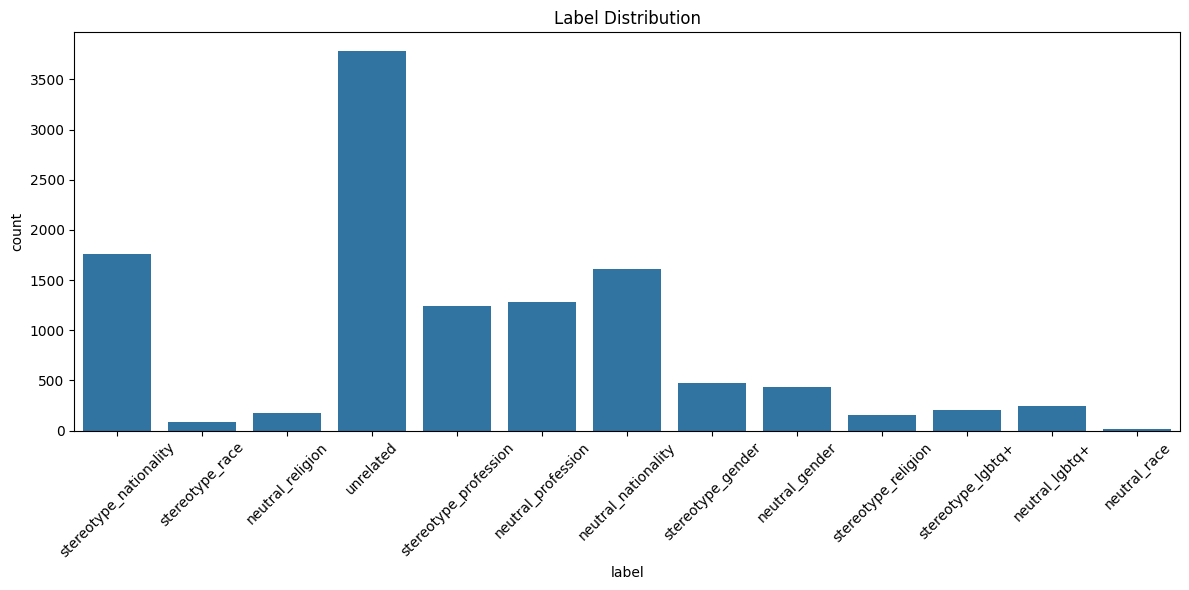


Class Proportions:
label
unrelated                 0.330478
stereotype_nationality    0.153483
neutral_nationality       0.140635
neutral_profession        0.112228
stereotype_profession     0.108207
stereotype_gender         0.040993
neutral_gender            0.037759
neutral_lgbtq+            0.021502
stereotype_lgbtq+         0.017743
neutral_religion          0.014859
stereotype_religion       0.013460
stereotype_race           0.007517
neutral_race              0.001136
Name: proportion, dtype: float64


In [43]:
print(dts['label'].value_counts())

#graph
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(data=dts, x='label')
plt.title("Label Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Automatically adjust layout
plt.show()

# Calculate class proportions to check for imbalance
class_proportions = dts['label'].value_counts(normalize=True)  # Normalize to get proportions
print("\nClass Proportions:")
print(class_proportions)

**Data Processing** to ensure the model is on its right track by **normalization, tokenization, and subword processing**, **Normalization** - Changing texts into lowercase, removing stopwords and puncutations.

In [44]:
import re #for pattern matching and text manipulation (regular expression)
import nltk #(NaturalLanguageToolKit)
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
# Define stopwords
stop_words = set(stopwords.words('english'))

# Function for text normalization
def normalize_text(text):
    # Step 1: Lowercasing
    text = text.lower()

    # Step 2: Remove punctuation (anything that's not a word or space)
    text = re.sub(r'[^\w\s]', '', text)

    # Step 3: Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply normalization to the 'text' column in the dataset
dts['normalized_text'] = dts['text'].apply(normalize_text)

# Show the results
print(dts[['text', 'normalized_text']].head())

                                                text  \
0            Central African rebels left towns dirty   
1  I have a feeling he got arrested. You never kn...   
2  I have a muslim neighbor who attends Mosque. H...   
3  The little girl went to the park. Eggs benedic...   
4  My coworker is from China The pencil on the co...   

                                     normalized_text  
0            central african rebels left towns dirty  
1    feeling got arrested never know young black men  
2  muslim neighbor attends mosque faith strong bi...  
3  little girl went park eggs benedict million va...  
4               coworker china pencil counter broken  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Tokenization** To break down text into individual tokens (words or subwords) for subwords we can use pretrained models to make it even more smaller meaningful chunks.

**Nessesary libs installed**
**Downloading SpaCy and Huggingface models** to work on text normalization/tokenization and work on out of vacabalory words.

**Hugging Face Tokenizer (BERT/DistilBERT)** for subword tokenization, especially for handling out-of-vocabulary words and improving efficiency.

**SpaCy** for basic text normalization tasks such as tokenization, stopword removal, and punctuation removal.

**DistilBERT or TinyBERT** for sustainability, as they are more resource-efficient.

Incorporate **bias detection preprocessing steps** to ensure fairness in the dataset.

explainability by using **SHAP and LIME** to generate model explanations at the token-level.

In [45]:
import spacy as spacy
from transformers import AutoTokenizer
import pandas as pd
import re
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load SpaCy model for text normalization
spacy_nlp = spacy.load("en_core_web_sm")

# Load Hugging Face Tokenizer (DistilBERT or BERT)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Function to tokenize using SpaCy (for basic tokenization and stop word removal)
def spacy_tokenize(text):
    doc = spacy_nlp(text)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

# Function to tokenize using Hugging Face tokenizer (subword tokenization)
def huggingface_tokenize(text):
    # Tokenizing with Hugging Face tokenizer
    return tokenizer.tokenize(text)

# Load your Duplicate   dataset into dts
dts = pd.read_csv('/content/Model/test.csv')

dts['normalized_text'] = dts['text'].apply(normalize_text)
dts['spacy_tokens'] = dts['normalized_text'].apply(spacy_tokenize)
dts['hf_tokens'] = dts['normalized_text'].apply(huggingface_tokenize)

# Display a sample of the dataset to check the tokenization
print(dts[['text', 'spacy_tokens', 'hf_tokens']].head())


                                                text  \
0            Central African rebels left towns dirty   
1  I have a feeling he got arrested. You never kn...   
2  I have a muslim neighbor who attends Mosque. H...   
3  The little girl went to the park. Eggs benedic...   
4  My coworker is from China The pencil on the co...   

                                        spacy_tokens  \
0     [central, african, rebels, left, towns, dirty]   
1  [feeling, got, arrested, know, young, black, men]   
2  [muslim, neighbor, attends, mosque, faith, str...   
3  [little, girl, went, park, eggs, benedict, mil...   
4         [coworker, china, pencil, counter, broken]   

                                           hf_tokens  
0     [central, african, rebels, left, towns, dirty]  
1  [feeling, got, arrested, never, know, young, b...  
2  [muslim, neighbor, attends, mosque, faith, str...  
3  [little, girl, went, park, eggs, benedict, mil...  
4  [cow, ##or, ##ker, china, pencil, counter, bro..

Generates **BIO tags** for each token in a given text, based on stereotype-related spans.

In [ ]:
#work on BIO tags (begin, inside, outside) once we get the stereotype_spans (words which has a list of all kinds of sterotypes)

In [46]:
import pandas as pd

# Load the stereotype_subgroup file
stereotype_subgroup = pd.read_csv('/content/Model/stereotype_subgroup.csv')
stereotype_subgroup = stereotype_subgroup.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Transform the stereotype_subgroup dataset into a mappings dictionary
stereotype_mappings = {}

for column in stereotype_subgroup.columns:
    # Get subgroups from each column, dropping NaN values
    subgroups = stereotype_subgroup[column].dropna().tolist()
    stereotype_mappings[column.lower()] = [s.lower() for s in subgroups]  # Convert to lowercase for consistency

print(stereotype_mappings)

# Flatten the mappings to get all stereotype words
stereotype_words = [word.strip() for words in stereotype_mappings.values() for word in words]

def bio_tag_tokens(tokens, stereotype_words):

    tags = ["O"] * len(tokens)  # Initialize all tags as 'O' (Outside)
    for i, token in enumerate(tokens):
        for word in stereotype_words:
            if token == word:
                tags[i] = "B" if i == 0 or tags[i-1] == "O" else "I"  # Assign 'B' or 'I'
    return tags

# Apply BIO tagging to the spacy_tokens column using the stereotype_mappings
dts['bio_tags'] = dts['spacy_tokens'].apply(lambda tokens: bio_tag_tokens(tokens, stereotype_words))

# Display the tagged dataset
print(dts[['spacy_tokens', 'bio_tags']])


<ipython-input-46-283bfd870640>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stereotype_subgroup = stereotype_subgroup.applymap(lambda x: x.lower() if isinstance(x, str) else x)


{'lgbtq+': ['abro', 'asexual', 'ace', 'aro', 'allo', 'aromantic', 'bi', 'bi-sexual', 'cisgender', 'cis', 'demi', 'femme', 'grey', 'homo', 'intersex', 'lesbian', 'gay', 'bisexual', 'transgender', 'queer', 'questioning', 'masc', 'non-binary', 'pan sexual', 'pan romantic', 'transsexual', 'tertiary', 'sapphic'], 'race': ['american indian', 'alaska native', 'asian', 'black', 'african american', 'native hawaiian', 'pacific islander', 'white'], 'profession': ['accountant', 'actor', 'actress', 'air traffic controller', 'architect', 'artist', 'attorney', 'banker', 'bartender', 'barber', 'bookkeeper', 'builder', 'businessman', 'businesswoman', 'businessperson', 'butcher', 'carpenter', 'cashier', 'chef', 'coach', 'dental hygienist', 'dentist', 'designer', 'developer', 'dietician', 'doctor', 'economist', 'editor', 'electrician', 'engineer', 'farmer', 'filmmaker', 'fisherman', 'flight attendant', 'jeweler', 'judge', 'lawyer', 'mechanic', 'musician', 'nutritionist', 'nurse', 'optician', 'painter', '

In [47]:
print(stereotype_subgroup.columns)


Index(['LGBTQ+', 'Race', 'Profession', 'Nationality', 'Religion'], dtype='object')


In [48]:
print(dts.columns)

Index(['stereotype_type', 'text', 'text_with_marker', 'category',
       'data_source', 'label', 'normalized_text', 'spacy_tokens', 'hf_tokens',
       'bio_tags'],
      dtype='object')


Choosing Granularity and Task Setup

In [49]:
from transformers import DistilBertTokenizerFast

# Ensure tokenization for the same input data
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Tokenize text
inputs = tokenizer(
    list(dts['normalized_text']),
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

input_ids = inputs['input_ids']
attention_masks = inputs['attention_mask']

# Split after tokenization to ensure alignment
from sklearn.model_selection import train_test_split

X_train, X_test, attention_masks_train, attention_masks_test, y_train, y_test = train_test_split(
    input_ids, attention_masks, dts.encoded_labels, test_size=0.2, random_state=42
)

#verify the splits
print(f"X_train shape: {X_train.shape}")
print(f"attention_masks_train shape: {attention_masks_train.shape}")
print(f"y_train shape: {y_train.shape}")



AttributeError: 'DataFrame' object has no attribute 'encoded_labels'

Making sure the **tokenization step** is consistent for both input_ids and attention_masks

In [13]:
# Check consistency before splitting
assert input_ids.size(0) == attention_masks.size(0), "Mismatch in tokenization outputs"
assert input_ids.size(0) == len(dts.encoded_labels), "Mismatch between tokenized inputs and labels"

AttributeError: 'DataFrame' object has no attribute 'encoded_labels'

**Realign Data Splits**
If tokenization was already done and there's a mismatch, you can filter or realign the attention_masks to match X_train and y_train sizes:


In [14]:
# Slice attention_masks to match X_train's size
attention_masks_train = attention_masks[:X_train.size(0)]
attention_masks_test = attention_masks[X_train.size(0):X_train.size(0) + X_test.size(0)]

assert len(X_train) == len(attention_masks_train) == len(y_train), "Train set mismatch"
assert len(X_test) == len(attention_masks_test) == len(y_test), "Test set mismatch"


NameError: name 'X_train' is not defined

In [30]:
from sklearn.model_selection import train_test_split

# Ensure all inputs are split together
X_train, X_test, attention_masks_train, attention_masks_test, y_train, y_test = train_test_split(
    input_ids,  # Tokenized input IDs
    attention_masks,  # Attention masks
    dts.encoded_labels,  # Corresponding labels (make sure this matches the length of input_ids)
    test_size=0.2,
    random_state=42
)

# Verify shapes after splitting
print(f"X_train shape: {X_train.shape}")
print(f"Attention masks train shape: {attention_masks_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Attention masks test shape: {attention_masks_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: torch.Size([9152, 35])
Attention masks train shape: torch.Size([9152, 35])
y_train shape: (9152,)
X_test shape: torch.Size([2289, 35])
Attention masks test shape: torch.Size([2289, 35])
y_test shape: (2289,)


**Model Setup:**
We will use a pre-trained DistilBERT model and fine-tune it for the classification task.

In [31]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained DistilBERT model for sequence classification (with 3 classes)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=torch.utils.data.TensorDataset(X_train, attention_masks, y_train),  ##this is to be checked....
    eval_dataset=torch.utils.data.TensorDataset(X_test, attention_masks, y_test),
)

# Start training
trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


AssertionError: Size mismatch between tensors

In [32]:
print("X_train shape:", X_train.shape)
print("Attention masks shape:", attention_masks.shape)
print("y_train shape:", y_train.shape)


X_train shape: torch.Size([9152, 35])
Attention masks shape: torch.Size([11441, 35])
y_train shape: (9152,)


In [28]:
print(f"Input IDs shape: {input_ids.shape}")
print(f"Attention Masks shape: {attention_masks.shape}")

Input IDs shape: torch.Size([11441, 35])
Attention Masks shape: torch.Size([11441, 35])


In [12]:
print(dts.columns)

Index(['stereotype_type', 'text', 'text_with_marker', 'category',
       'data_source', 'label', 'normalized_text', 'spacy_tokens', 'hf_tokens',
       'inputs', 'encoded_labels'],
      dtype='object')


**Turstworthiness and Measures**
Fairness - Ensure the model treats different subgroups fairly and does not propagate stereotypes.

To Set up Bias Testing to evaluate bias metrics across subgroups.
**Installing the required Tools AIF360 and fairlearn**

In [33]:
!pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.7 MB/s eta 0:00:00


In [34]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 3.9 MB/s eta 0:00:00


In [16]:
#Identifying the sensitive attributes present in the database
import pandas as pd

# Load the CSV file containing stereotype categories and subgroups
subgroup_csv = '/content/Model/stereotype_subgroup.csv'
subgroups_df = pd.read_csv(subgroup_csv)

# Convert all entries in the dataframe to lowercase for consistency
subgroups_df = subgroups_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Display the loaded data to ensure it matches your expectations
print(subgroups_df.head())


    LGBTQ+              Race              Profession Nationality
0     abro   american indian              accountant      afghan
1  asexual     alaska native                   actor    albanian
2      ace             asian                 actress    algerian
3      aro             black  air traffic controller    american
4     allo  african american               architect    andorran


<ipython-input-16-583c030a7911>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subgroups_df = subgroups_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [17]:
# Create a mapping dictionary from the dataframe
subgroup_mapping = {}
for column in subgroups_df.columns:
    subgroup_mapping[column.lower()] = subgroups_df[column].dropna().tolist()

# Display the created mapping for confirmation
for stereotype, subgroups in subgroup_mapping.items():
    print(f"{stereotype}: {subgroups[:5]} ...")  # Show a preview for each stereotype


lgbtq+: ['abro', 'asexual', 'ace', 'aro', 'allo'] ...
race: ['american indian', 'alaska native', 'asian', 'black', 'african american'] ...
profession: ['accountant', 'actor', 'actress', 'air traffic controller', 'architect'] ...
nationality: ['afghan', 'albanian', 'algerian', 'american', 'andorran'] ...


In [18]:
# Function to assign subgroups based on stereotype type
def assign_subgroup(row):
    stereotype_type = row['stereotype_type'].lower()  # Ensure case consistency
    if stereotype_type in subgroup_mapping:
        return subgroup_mapping[stereotype_type]  # Return the list of subgroups
    return None  # Return None if no match is found

# Apply subgroup assignment to the dataset
dts['subgroups'] = dts.apply(assign_subgroup, axis=1)

# Verify the result
print(dts[['stereotype_type', 'subgroups']].head())


  stereotype_type                                          subgroups
0     nationality  [afghan, albanian, algerian, american, andorra...
1            race  [american indian, alaska native, asian, black,...
2        religion                                               None
3          gender                                               None
4     nationality  [afghan, albanian, algerian, american, andorra...


Evaualte the Model preditions for bias
Use **Fairlearn's MetricFrame** to compare performance across subgroups Measure fairness metrics such as demographic parity, equal opportunity, or disparate impact.

In [19]:
import pandas as pd
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

# Define device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

subgroups_df = subgroups_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Load the pre-trained model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Move model to device (GPU/CPU)
model = model.to(device)

# Tokenize and prepare the input data
inputs = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate predictions
with torch.no_grad():
    outputs = model(**inputs)

# Get predictions (argmax to get the most likely class)
y_pred = torch.argmax(outputs.logits, axis=1).cpu().numpy()

# Map sensitive attributes to subgroup categories
sensitive_attribute = dts_test['stereotype_type'].str.lower().map(
    lambda x: subgroups_df[x].dropna().tolist() if x in subgroups_df.columns else 'unknown'
)

# Step 4: Evaluate Bias Using Fairlearn MetricFrame
metrics = MetricFrame(
    metrics=accuracy_score,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_attribute
)

# Print Overall and Subgroup Performance
print("Overall Accuracy:", metrics.overall)
print("Accuracy by Subgroup:", metrics.by_group)

# Visualize the accuracy by subgroup
metrics.by_group.plot(kind='bar', title='Accuracy by Subgroup', ylabel='Accuracy', figsize=(10, 6))
plt.xlabel("Subgroups")
plt.ylabel("Accuracy")
plt.show()

# Step 6: Mitigate Bias Using Post-Processing (Optional)
from fairlearn.postprocessing import ThresholdOptimizer

optimizer = ThresholdOptimizer(
    estimator=model,
    constraints="equalized_odds",
    prefit=True
)

model_fair = optimizer.fit(
    X_train.cpu().numpy(), y_train.cpu().numpy(), sensitive_features=sensitive_attribute
)

# Evaluate mitigated model
y_pred_fair = model_fair.predict(X_test.cpu().numpy(), sensitive_features=sensitive_attribute)
metrics_fair = MetricFrame(
    metrics=accuracy_score,
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=sensitive_attribute
)

# Print Mitigated Model Performance
print("Fair Model Overall Accuracy:", metrics_fair.overall)
print("Fair Model Accuracy by Subgroup:", metrics_fair.by_group)


<ipython-input-19-cabd3dd6f25c>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subgroups_df = subgroups_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: name 'X_test' is not defined